### Dataframe exploration

In [1]:
import resources as helpers
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file

In [3]:
helpers.de.look_dataframe(df)    #Look at dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Column Names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long']
Number of observation: 30155
Duplicates detected


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


N/A detected
Columns with NaN:  ['heat_source', 'sewer_system']


In [4]:
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

heat_source has 8/30155 unique observations. 
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
Number of missing values: 32
sewer_system has 5/30155 unique observations. 
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64
Number of missing values: 14


,heat_source,sewer_system
0,Gas,PUBLIC
1,Oil,PUBLIC
2,Gas,PUBLIC
3,Gas,PUBLIC
4,Electricity,PUBLIC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   heat_source   30123 non-null  object
 1   sewer_system  30141 non-null  object
dtypes: object(2)
memory usage: 471.3+ KB


None

**Column Names:** <br>
'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long'

**Useful:** <br>
'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'

**Useless:** <br>
'date', 'id', 'lat', 'long', 'address'

**Potentially Useful:** <br>
'yr_built', 'yr_renovated'

**Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns

In [5]:
df_cleaned = helpers.dp.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of Missing Values: 0
Number of duplicates: 1
Removed 1 duplicates
Number of duplicates: 0


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='id', ylabel='price'>)

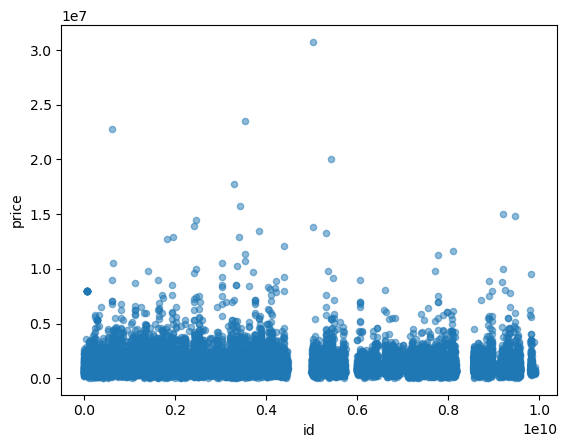

In [6]:
helpers.dv.plot_dataframe(df, ['id'], 'price')


In [7]:


df_num, df_obj = helpers.dp.seperate_dataframe(df)
df_obj = pd.concat([df_obj, df_num['price']],axis= 1)
df_obj


,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,price
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",675000.0
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",920000.0
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9...",311000.0
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",775000.0
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",592500.0
...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,"4673 Eastern Avenue North, Seattle, Washington...",1555000.0
30151,6/16/2021,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,"4131 44th Avenue Southwest, Seattle, Washingto...",1313000.0
30152,5/27/2022,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,"910 Martin Luther King Jr Way, Seattle, Washin...",800000.0
30153,2/24/2022,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,"17127 114th Avenue Southeast, Renton, Washingt...",775000.0


In [8]:
df_num.drop(['yr_renovated', 'lat', 'long'], axis = 1, inplace = True)
df_obj.drop(['date', 'address'], axis = 1, inplace= True)

In [9]:
obj_list = ['waterfront','greenbelt','nuisance','view','condition','grade','heat_source','sewer_system']
df_obj_prep = pd.get_dummies(df_obj, columns= obj_list)
x_list = df_obj_prep.columns

X = pd.get_dummies(df_obj_prep)
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.749e+32
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:28:07   Log-Likelihood:             5.7071e+05
No. Observations:               30110   AIC:                        -1.141e+06
Df Residuals:                   30077   BIC:                        -1.141e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [11]:
df_obj.value_counts().sum()
df_obj['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [12]:
for column in df_obj.columns:
    replace = df_obj[column].value_counts()[df_obj[column].value_counts()< 300].index
    df_obj[column].replace(replace, value= 'other',inplace= True)


In [13]:
for column in df_obj.columns:
    print(column)
    print(df_obj[column].value_counts())

df_num[['price']]

waterfront
NO     29599
YES      511
Name: waterfront, dtype: int64
greenbelt
NO     29338
YES      772
Name: greenbelt, dtype: int64
nuisance
NO     24861
YES     5249
Name: nuisance, dtype: int64
view
NONE         26554
AVERAGE       1910
GOOD           877
EXCELLENT      549
other          220
Name: view, dtype: int64
condition
Average      18514
Good          8052
Very Good     3258
other          286
Name: condition, dtype: int64
grade
7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
other              202
Name: grade, dtype: int64
heat_source
Gas            20575
Electricity     6460
Oil             2899
other            176
Name: heat_source, dtype: int64
sewer_system
PUBLIC     25766
PRIVATE     4336
other          8
Name: sewer_system, dtype: int64
price
other       29459
650000.0      345
750000.0      306
Name: price, dtype: int64


,price
0,675000.0
1,920000.0
2,311000.0
3,775000.0
4,592500.0
...,...
30150,1555000.0
30151,1313000.0
30152,800000.0
30153,775000.0


In [14]:
pd.concat([df_obj, df_num[['price']]])
#df_obj.corrwith(df_obj['price'])

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,price
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,other
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,other
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,other
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,other
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,other
...,...,...,...,...,...,...,...,...,...
30150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1555000.0
30151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1313000.0
30152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0
30153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775000.0


In [15]:
df_obj

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,price
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,other
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,other
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,other
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,other
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,other
...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,other
30151,NO,NO,NO,other,Average,7 Average,Gas,PUBLIC,other
30152,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,other
30153,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,other
